# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head(10)

,brad,brian,david,doug,jerry,jim,kenny,kevin,nikki,ray,ricky,ron
aa,0,0,0,1,0,0,0,0,0,0,0,0
aaaaaa,0,0,0,0,0,0,2,0,0,0,0,0
aagh,0,0,0,1,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,3,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,2,0,0
aarons,0,0,0,0,0,0,0,0,0,1,0,0
abandoned,0,0,0,0,0,0,0,0,1,0,0,0
abducting,0,0,0,0,0,0,0,0,0,0,1,0
ability,0,0,0,0,0,0,0,0,1,0,0,0
able,1,3,3,1,0,1,0,2,2,0,2,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

#it loops over each column in the data DataFrame, and for each column(a column means a comedian name),
# it sorts the values in descending order and selects the top 30 values. 
#The column name and the top 30 values (index and value) are stored as a tuple
# in a list, which is then assigned to the key in the top_dict dictionary 
#corresponding to the column name.


#In the end, top_dict will be a dictionary where each key is a column name 
#in the data DataFrame, and its value is a list of tuples, where each tuple 
#contains the index and value of one of the top 30 values for that column.

{'brad': [('like', 210),
  ('just', 84),
  ('dont', 84),
  ('im', 82),
  ('thats', 78),
  ('know', 69),
  ('youre', 63),
  ('audience', 62),
  ('okay', 61),
  ('right', 61),
  ('people', 60),
  ('laughing', 50),
  ('say', 47),
  ('black', 47),
  ('want', 39),
  ('going', 38),
  ('did', 34),
  ('shit', 31),
  ('man', 30),
  ('make', 30),
  ('got', 29),
  ('time', 29),
  ('dad', 29),
  ('little', 29),
  ('fuck', 28),
  ('white', 27),
  ('yeah', 26),
  ('look', 24),
  ('theyre', 23),
  ('gonna', 23)],
 'brian': [('dont', 60),
  ('like', 57),
  ('im', 50),
  ('know', 37),
  ('just', 34),
  ('crime', 33),
  ('going', 27),
  ('got', 25),
  ('want', 25),
  ('said', 22),
  ('time', 21),
  ('youre', 19),
  ('thank', 18),
  ('people', 18),
  ('thats', 18),
  ('oh', 15),
  ('say', 15),
  ('think', 15),
  ('uh', 14),
  ('ticket', 14),
  ('come', 13),
  ('make', 12),
  ('little', 12),
  ('hey', 12),
  ('way', 11),
  ('does', 11),
  ('stuff', 11),
  ('look', 11),
  ('didnt', 10),
  ('mushrooms', 10)

In [3]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

#This code snippet seems to be trying to print the top words for each comedian
# in a dictionary called "top_dict". The dictionary's keys are the names of the
# comedians and the values are lists of words and their count.

#For each comedian, the code uses a for loop to extract the top 14 words and 
#their count from the list of words. The words are then joined together into 
#a single string separated by commas and brackets are added around the 
#comedian's name. The code then prints the resulting string along with a separator ("---").

brad
like, just, dont, im, thats, know, youre, audience, okay, right, people, laughing, say, black
---
brian
dont, like, im, know, just, crime, going, got, want, said, time, youre, thank, people
---
david
know, im, like, just, dont, right, thats, gonna, theres, oh, uh, shes, think, thing
---
doug
just, like, im, dont, fucking, know, thats, youre, gonna, time, people, want, shit, hes
---
jerry
dont, like, im, know, just, youre, people, thats, say, life, think, great, phone, right
---
jim
guns, right, dont, fucking, im, like, youre, people, thats, know, gun, just, think, fuck
---
kenny
like, im, just, guys, dont, bro, know, hey, yeah, nice, okay, come, thats, mom
---
kevin
im, dont, fcking, said, got, know, thats, fck, like, man, just, right, gonna, shit
---
nikki
like, just, im, know, dont, youre, thats, cause, good, want, oh, guy, going, guys
---
ray
know, im, dont, right, like, youre, yeah, got, gonna, thats, just, good, hes, little
---
ricky
right, like, just, id, dont, im, know, oh,

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

#. The "Counter" class in the "collections" module is a dict subclass for
# counting hashable objects. It is often used for keeping track of the number
# of occurrences of elements in a list, tuple, or any other iterable.

#>>> from collections import Counter
#>>> c = Counter([1,1,2,3,4,5,3,2,3,4,2,1,2,3])
#>>> print(c)
#Counter({2: 4, 3: 4, 1: 3, 4: 2, 5: 1})

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'just',
 'dont',
 'im',
 'thats',
 'know',
 'youre',
 'audience',
 'okay',
 'right',
 'people',
 'laughing',
 'say',
 'black',
 'want',
 'going',
 'did',
 'shit',
 'man',
 'make',
 'got',
 'time',
 'dad',
 'little',
 'fuck',
 'white',
 'yeah',
 'look',
 'theyre',
 'gonna',
 'dont',
 'like',
 'im',
 'know',
 'just',
 'crime',
 'going',
 'got',
 'want',
 'said',
 'time',
 'youre',
 'thank',
 'people',
 'thats',
 'oh',
 'say',
 'think',
 'uh',
 'ticket',
 'come',
 'make',
 'little',
 'hey',
 'way',
 'does',
 'stuff',
 'look',
 'didnt',
 'mushrooms',
 'know',
 'im',
 'like',
 'just',
 'dont',
 'right',
 'thats',
 'gonna',
 'theres',
 'oh',
 'uh',
 'shes',
 'think',
 'thing',
 'hes',
 'going',
 'yeah',
 'really',
 'fucking',
 'trump',
 'got',
 'people',
 'okay',
 'thank',
 'time',
 'good',
 'want',
 'wife',
 'tell',
 'guys',
 'just',
 'like',
 'im',
 'dont',
 'fucking',
 'know',
 'thats',
 'youre',
 'gonna',
 'time',
 'people',
 'want',
 'shit',
 'hes',
 'got',
 'right',
 'fuck',


In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

#like apperas 12 times means likes is one of the most common usd word by each comedian

[('like', 12),
 ('just', 12),
 ('dont', 12),
 ('im', 12),
 ('thats', 12),
 ('know', 12),
 ('right', 11),
 ('youre', 10),
 ('got', 10),
 ('people', 9),
 ('oh', 9),
 ('want', 8),
 ('going', 8),
 ('gonna', 7),
 ('think', 7),
 ('come', 7),
 ('say', 6),
 ('time', 6),
 ('little', 6),
 ('yeah', 6),
 ('theyre', 6),
 ('good', 6),
 ('shit', 5),
 ('thing', 5),
 ('fucking', 5),
 ('cause', 5),
 ('okay', 4),
 ('did', 4),
 ('make', 4),
 ('fuck', 4),
 ('theres', 4),
 ('hes', 4),
 ('guy', 4),
 ('man', 3),
 ('said', 3),
 ('uh', 3),
 ('didnt', 3),
 ('shes', 3),
 ('really', 3),
 ('guys', 3),
 ('gotta', 3),
 ('went', 3),
 ('house', 3),
 ('ill', 3),
 ('ive', 3),
 ('look', 2),
 ('thank', 2),
 ('hey', 2),
 ('wife', 2),
 ('tell', 2),
 ('phone', 2),
 ('love', 2),
 ('feel', 2),
 ('sex', 2),
 ('goes', 2),
 ('day', 2),
 ('id', 2),
 ('years', 2),
 ('audience', 1),
 ('laughing', 1),
 ('black', 1),
 ('dad', 1),
 ('white', 1),
 ('crime', 1),
 ('ticket', 1),
 ('way', 1),
 ('does', 1),
 ('stuff', 1),
 ('mushrooms', 1),


In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'just',
 'dont',
 'im',
 'thats',
 'know',
 'right',
 'youre',
 'got',
 'people',
 'oh',
 'want',
 'going',
 'gonna',
 'think',
 'come']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS).append(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))

# The pickle.dump function is used to serialize an object and save it to disk 
#as a binary file. The first line of code uses pickle.dump to serialize the cv
#object and save it to a file named "cv_stop.pkl".

data_stop.to_pickle("dtm_stop.pkl")

In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

#The WordCloud class generates a word cloud image from a given text. 
#The stopwords parameter is set to the stop_words variable and is used to 
#specify a list of stop words to be excluded from the word cloud. 
#The background_color parameter is set to "white" to specify the background 
#color of the word cloud image. The colormap parameter is set to "Dark2" and
# is used to specify the color palette for the word cloud. The max_font_size
# parameter is set to 150 and determines the maximum font size for the words 
#in the word cloud. The random_state parameter is set to 42 and is used to seed
# the random number generator to produce reproducible results.


In [19]:
# Reset the output dimensions
import os
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

#plt.rcParams is a dictionary-like object that holds all default parameters
#for Matplotlib, and 'figure.figsize' is one of those parameters, which 
#determines the default size of a figure. The code sets the default size of
# a figure to 16 inches wide and 6 inches tall.

full_names=['ricky gervais','brian regan','doug stanhope','kevin hart','kenny sebastian','jerry seinfeld','nikki glaser','david cross','jim jefferies','ray romano','ron white','brad williams']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3,4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
folder_name = "results"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the plot in the "results" folder
file_name = "Wordcloud.png"  # Specify the desired file name and extension
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)

# Close the plot
plt.close()

# first uses the enumerate function to loop through the columns of the dataframe,
# where each column is a transcript for a different comedian. It then generates
# a word cloud for each transcript using the "wc.generate()" method, where "wc"
# is an instance of a word cloud generator. 

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis

In [10]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

#The code creates a list unique_list of unique words for each comedian in the 
#data dataframe, where data is assumed to have comedian names as columns. The 
#unique word count is obtained by converting each comedian's data to a numpy array, 
#then counting the non-zero values in that array. The resulting unique_list is 
#then combined with the full_names list (which is assumed to be defined elsewhere)
#into a new dataframe data_words with two columns, 'comedian' and 'unique_words', 
#which is then sorted by 'unique_words' in ascending order and stored in
#data_unique_sort.

,comedian,unique_words
5,jerry seinfeld,447
9,ray romano,993
6,nikki glaser,1040
1,brian regan,1120
11,brad williams,1290
0,ricky gervais,1309
8,jim jefferies,1324
7,david cross,1330
4,kenny sebastian,1424
10,ron white,1470


In [11]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 67, 73, 77, 62, 58, 76, 79,69,71]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
5,jerry seinfeld,447,1037,77,13.467532
1,brian regan,1120,2567,59,43.508475
9,ray romano,993,3566,79,45.139241
4,kenny sebastian,1424,3478,73,47.643836
11,brad williams,1290,3605,71,50.774648
6,nikki glaser,1040,3252,62,52.451613
2,doug stanhope,1628,4651,80,58.137500
3,kevin hart,1682,4073,67,60.791045
8,jim jefferies,1324,4639,76,61.039474
10,ron white,1470,4601,69,66.681159


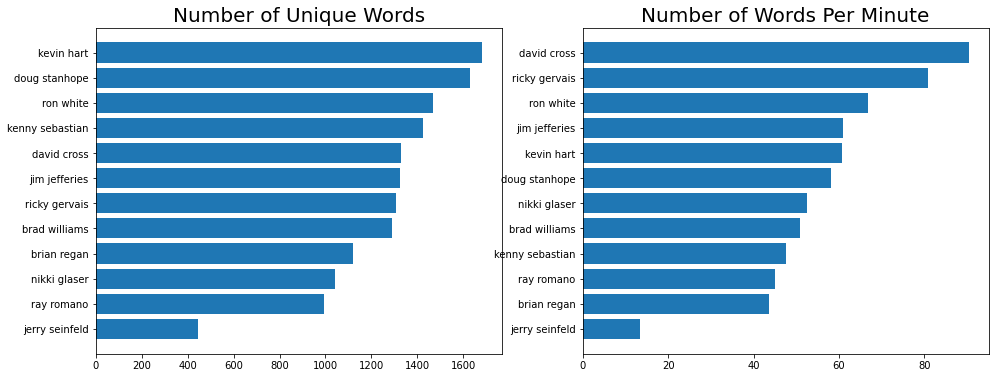

In [21]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)
file_name = "words.png"  # Specify the desired file name and extension
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)

plt.show()

### Findings

## Amount of Profanity

### Analysis

In [13]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('just', 12),
 ('dont', 12),
 ('im', 12),
 ('thats', 12),
 ('know', 12),
 ('right', 11),
 ('youre', 10),
 ('got', 10),
 ('people', 9),
 ('oh', 9),
 ('want', 8),
 ('going', 8),
 ('gonna', 7),
 ('think', 7),
 ('come', 7),
 ('say', 6),
 ('time', 6),
 ('little', 6),
 ('yeah', 6),
 ('theyre', 6),
 ('good', 6),
 ('shit', 5),
 ('thing', 5),
 ('fucking', 5),
 ('cause', 5),
 ('okay', 4),
 ('did', 4),
 ('make', 4),
 ('fuck', 4),
 ('theres', 4),
 ('hes', 4),
 ('guy', 4),
 ('man', 3),
 ('said', 3),
 ('uh', 3),
 ('didnt', 3),
 ('shes', 3),
 ('really', 3),
 ('guys', 3),
 ('gotta', 3),
 ('went', 3),
 ('house', 3),
 ('ill', 3),
 ('ive', 3),
 ('look', 2),
 ('thank', 2),
 ('hey', 2),
 ('wife', 2),
 ('tell', 2),
 ('phone', 2),
 ('love', 2),
 ('feel', 2),
 ('sex', 2),
 ('goes', 2),
 ('day', 2),
 ('id', 2),
 ('years', 2),
 ('audience', 1),
 ('laughing', 1),
 ('black', 1),
 ('dad', 1),
 ('white', 1),
 ('crime', 1),
 ('ticket', 1),
 ('way', 1),
 ('does', 1),
 ('stuff', 1),
 ('mushrooms', 1),


In [14]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
brad,34,31
brian,0,0
david,44,16
doug,85,29
jerry,0,0
jim,34,1
kenny,0,22
kevin,0,46
nikki,19,5
ray,3,7


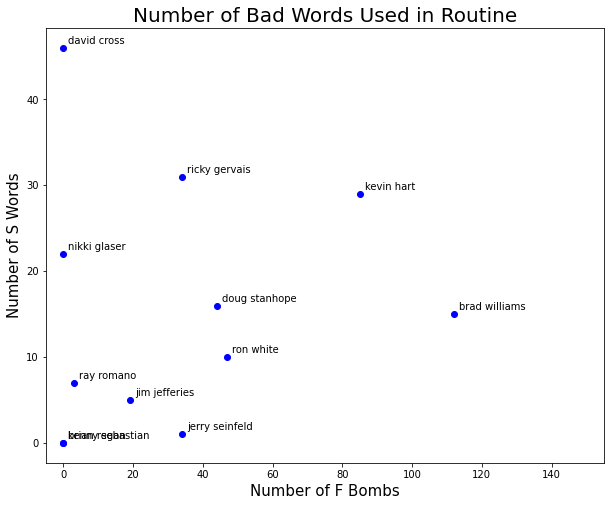

In [22]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)
file_name = "badwords.png"  # Specify the desired file name and extension
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)
plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [16]:
data_words = data.transpose()[['work', 'like','film']]
data_prof = pd.concat([data_words.work + data_words.like,data_words.film], axis=1)
data_prof.columns = ['AA','BB']
data_prof

,AA,BB
brad,216,0
brian,59,0
david,119,0
doug,84,1
jerry,70,0
jim,22,0
kenny,155,1
kevin,68,0
nikki,445,0
ray,64,0


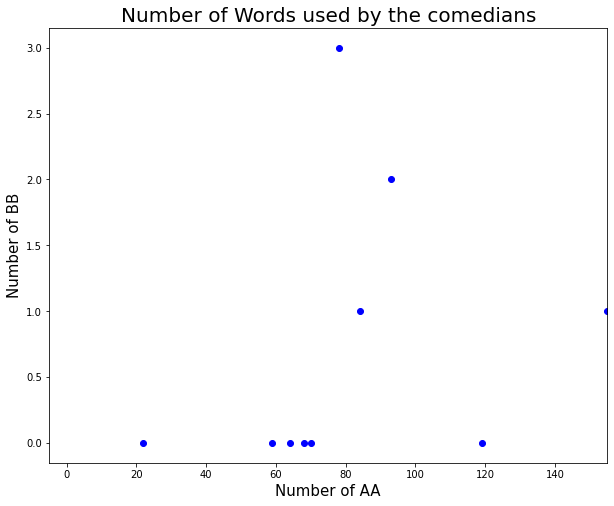

In [17]:
#create a scatter plot of this

plt.rcParams['figure.figsize'] = [10, 8]

for i, interviewer in enumerate(data_prof.index):
    x = data_prof.AA.loc[interviewer]
    y = data_prof.BB.loc[interviewer]
    plt.scatter(x, y, color='blue')
    # plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Words used by the comedians', fontsize = 20)
plt.xlabel('Number of AA', fontsize=15)
plt.ylabel('Number of BB', fontsize=15)

plt.show()